
Objectif de ce code : 
Avoir une vision globale des émissions de CO2 au niveau monde
- Evolution entre 1960 et 2014
- Part de chaque type d'énergie dans les émissions de CO2
- Part de chaque secteur dans les émissions de CO2


In [13]:
# Library import

import pandas as pd
import matplotlib.pyplot as plt

# Command so that plots appear in the iPython Notebook
%matplotlib inline

# IMPORT DES DONNEES

In [7]:
data = pd.read_csv('C:\\etude_cas_mcougul\\data\\WDIData.csv', sep=',')
country = pd.read_csv('C:\\etude_cas_mcougul\\data\\WDICountry.csv', sep=',')
series_1= pd.read_csv('C:\\etude_cas_mcougul\\data\\WDISeries.csv', sep=',')


#    II - ANALYSE PRELIMINAIRE AU NIVEAU MONDIAL

In [11]:
# 1 - EVOLUTION DE L'EMISSION DE CO2 AU NIVEAU MONDE DE 1960 A 2014

# On ne garde que les données Monde

world = data[data['Country Code'] == 'WLD']

# On ne garde que les données concernant les émissions de CO2

world_co2_emission = world[world['Indicator Code'] == 'EN.ATM.CO2E.KT']

# On nettoie la table pour ne garder que les champs qui nous intéresse

world_co2_emission.drop(['Country Code','Indicator Name','Indicator Code','2015','2016','2017','Unnamed: 62'],axis=1,inplace=True)


C:\Users\mcoug\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


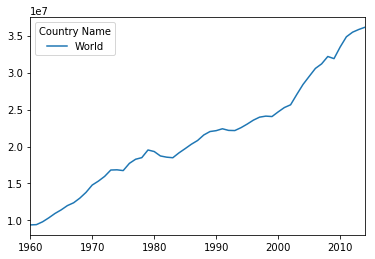

In [14]:
# Représentation graphique des données

world_co2_emission.set_index('Country Name').T.plot()

Note de lecture : Les émissions de CO2 au niveau mondial connait une tendance constante à la hausse depuis 1960.

In [15]:
# 2 - PART DE CHAQUE TYPE D'ENERGIE DANS LES EMISSIONS DE CO2 EN 2014

# On crée une table pour chaque type d'énergie avec les données correspondantes sur 2014
# Puis on renomme le champ avec le nom du type d'énergie 

def type_energie(nom,code):
     
    table_energie = world[data['Indicator Code'] == code]
    table_energie = table_energie[['Country Name','2014']]
    table_energie.rename(columns={"2014": "{0}".format(nom)}, inplace=True)
    return table_energie

gaseous_fuel=type_energie('gaseous_fuel','EN.ATM.CO2E.GF.ZS')
liquid_fuel=type_energie('liquid_fuel','EN.ATM.CO2E.LF.ZS')
solid_fuel=type_energie('solid_fuel','EN.ATM.CO2E.SF.ZS')

# On crée la table avec les données sur les 3 types d'énergie

part_energie_dans_emission=pd.merge(pd.merge(gaseous_fuel,liquid_fuel,on='Country Name'),solid_fuel,on='Country Name')

# On ajoute un champ 'Other' pour avoir une somme égale à 100%

part_energie_dans_emission["other"] = 100-(part_energie_dans_emission["gaseous_fuel"]+part_energie_dans_emission["liquid_fuel"]+part_energie_dans_emission["solid_fuel"])


C:\Users\mcoug\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [17]:
print(part_energie_dans_emission)

  Country Name  gaseous_fuel  liquid_fuel  solid_fuel    other
0        World     18.498224    33.282598   41.775748  6.44343


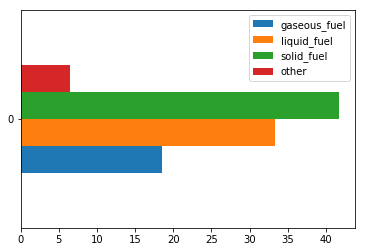

In [18]:
# Représentation graphique des données

part_energie_dans_emission.plot.barh()

Note de lecture : En 2014, les énérgies solides et liquides étaient responsables, respectivement, de 42% et 33% des émissions globales de CO2 alors que le gaz, lui, ne créait que 18% des émissions.


In [19]:
# 3 - PART DE CHAQUE SECTEUR DANS LES EMISSIONS DE CO2

# On crée une table pour chaque secteur avec les données correspondantes sur 2014
# Puis on renomme le champ avec le nom du secteur 

def secteurs(nom,code):
     
    table_secteurs = world[data['Indicator Code'] == code]
    table_secteurs = table_secteurs[['Country Name','2014']]
    table_secteurs.rename(columns={"2014": "{0}".format(nom)}, inplace=True)
    return table_secteurs

buildings=secteurs('buildings','EN.CO2.BLDG.ZS')
electricity=secteurs('electricity and heat production','EN.CO2.ETOT.ZS')
industries=secteurs('industries and construction','EN.CO2.MANF.ZS')
transport=secteurs('transport','EN.CO2.TRAN.ZS')
other=secteurs('other','EN.CO2.OTHX.ZS')

# On crée la table avec les données sur les 5 secteurs

part_secteurs_dans_emission=buildings.merge(electricity,on='Country Name').merge(industries,on='Country Name').merge(transport,on='Country Name').merge(other,on='Country Name')


C:\Users\mcoug\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [20]:
print(part_secteurs_dans_emission)

  Country Name  buildings  electricity and heat production  \
0        World    8.59532                        49.040197   

   industries and construction  transport     other  
0                    19.960318  20.449062  1.955232  


([<matplotlib.patches.Wedge at 0x21469077ef0>,
  <matplotlib.text.Text at 0x21403812780>])

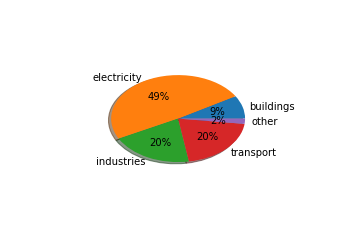

In [21]:
# Représentation graphique des données

labels = 'buildings', 'electricity', 'industries', 'transport','other'
plt.pie(part_secteurs_dans_emission.set_index('Country Name').T,autopct='%.0f%%',labels=labels,shadow=True, radius=0.5)


Note de lecture : Trois secteurs produisent près de 90% des émissions de CO2 globales. Il s'agit de l'électricité, de loin le plus important avec 49% des émissions, suivi du transport et des industries à hauteur de 20% chacun.